In [1]:
from astropy.io import fits
import numpy as np
import os.path
import matplotlib.pyplot as plt
from astropy import wcs
from astropy.nddata import Cutout2D
from astropy import coordinates
from astropy import units as u
from astropy.coordinates import SkyCoord
from astropy.wcs import WCS
import matplotlib.gridspec as gridspec
import aplpy
import pandas as pd
from photutils import SkyCircularAperture
from photutils import aperture_photometry
from utilities import cutout
%matplotlib inline

In [2]:
#first make cutouts of different sizes for spitzer, and store them in surveys/cutouts/test_spitzer
#sizes are 10 arcsec w/rms map, 10 arcsec w/o rms map, 15 arcsec w/o, 20 arcsec w/o
#then run sextractor analysis on those cutouts, with background mesh=17 fixed, and also for mesh=34
#just photutils an aperture at the center of the image (chandra catalogue source location)
#either for the sex rms map or the 
#make histograms
g = cutout(Weight=True, RMS=False, Instr='Spitzer', arcsec=40.)
h = cutout(Weight=False, RMS=False, Instr='Spitzer', arcsec=40.)
j = cutout(Weight=False, RMS=True, Instr='Spitzer', arcsec=40.)


the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]


In [3]:
path = '/Users/justin/Documents/Master_Thesis/data/catalogues/chandra_7ms/big_table.fits'
big_table = fits.open(path)[1].data
a = ['spitzer_ch1_', 'spitzer_ch1_', 'spitzer_ch1_']
b = ['spitzer_ch1', 'spitzer_ch1', 'spitzer_ch1']
c = ['spitzer_10', 'spitzer_20', 'spitzer_40']
aper_pixel = 1.
min_area = 1.
n_thresh = 64.
min_cont = 0.0001
for j in range(len(a)):
    for i in range(big_table.size):
        conf_path = ' /Users/justin/Documents/Master_Thesis/data/catalogues/spitzer/' + b[j] + '.conf'
        im_path = ' /Users/justin/Documents/Master_Thesis/data/surveys/cutouts/' + c[j] + '/cutout_' + a[j] + str(i+1) + '.fits'
        dualim_path = ' /Users/justin/Documents/Master_Thesis/data/surveys/cutouts/' + c[j] + '/cutout_' + a[j] + str(i+1) + '.fits,/Users/justin/Documents/Master_Thesis/data/surveys/cutouts/' + c[j] + '/cutout_' + a[j] + str(i+1) + '.fits'
        cat_path = ' /Users/justin/Documents/Master_Thesis/data/catalogues/cutouts/' + c[j] + '/cat_' + a[j] + str(i+1) + '.cat'
        wht_path = ' /Users/justin/Documents/Master_Thesis/data/surveys/cutouts/' + c[j] + '/cutout_' + a[j] + str(i+1) + 'wht.fits'
        rms_path = ' /Users/justin/Documents/Master_Thesis/data/surveys/cutouts/' + c[j] + '/cutout_' + a[j] + str(i+1) + 'rms.fits'
        rmswht_path = ' /Users/justin/Documents/Master_Thesis/data/surveys/cutouts/' + c[j] + '/cutout_' + a[j] + str(i+1) + 'rms.fits,/Users/justin/Documents/Master_Thesis/data/surveys/cutouts/' + c[j] + '/cutout_' + a[j] + str(i+1) + 'wht.fits'
        check_path = ' /Users/justin/Documents/Master_Thesis/data/catalogues/cutouts/' + c[j] + '/cat_' + a[j] + str(i+1) + '_aper.fits,/Users/justin/Documents/Master_Thesis/data/catalogues/cutouts/' + c[j] + '/cat_' + a[j] + str(i+1) + '_bkg.fits,/Users/justin/Documents/Master_Thesis/data/catalogues/cutouts/' + c[j] + '/cat_' + a[j] + str(i+1) + '_bkg_rms.fits' 
        path = 'sex -c' + conf_path + dualim_path + ' -CATALOG_NAME' + cat_path + ' -WEIGHT_TYPE MAP_RMS,MAP_WEIGHT -WEIGHT_GAIN N,Y -WEIGHT_IMAGE' + rmswht_path + ' -DETECT_MINAREA ' + str(min_area) + ' -PHOT_APERTURES ' + str(aper_pixel) + ' -CHECKIMAGE_NAME' + check_path + ' -BACK_SIZE 17 -DEBLEND_MINCONT ' + str(min_cont) + ' -DEBLEND_NTHRESH ' + str(n_thresh) + ' -MASK_TYPE NONE -FILTER N'
        os.system(path)

In [4]:
phot=[np.zeros(len(big_table)), np.zeros(len(big_table)), np.zeros(len(big_table)), np.zeros(len(big_table))]
for i in range(big_table.size):
    ra=big_table.field('RA')[i]
    dec=big_table.field('Dec')[i]
    path = '/Users/justin/Documents/Master_Thesis/data/surveys/cutouts/spitzer_10/cutout_spitzer_ch1_' + str(i+1) + 'rms.fits'
    im = fits.open(path)[0]
    position = SkyCoord(ra*u.deg, dec*u.deg, frame='icrs')
    circaper = SkyCircularAperture(position, r=2.*u.arcsec)
    phot_table = aperture_photometry(im, circaper)
    phot[0][i]=phot_table['aperture_sum'][0]
    path = '/Users/justin/Documents/Master_Thesis/data/catalogues/cutouts/spitzer_10/cat_spitzer_ch1_' + str(i+1) + '_bkg_rms.fits'
    im = fits.open(path)[0]
    position = SkyCoord(ra*u.deg, dec*u.deg, frame='icrs')
    circaper = SkyCircularAperture(position, r=2.*u.arcsec)
    phot_table = aperture_photometry(im, circaper)
    phot[1][i]=phot_table['aperture_sum'][0]
    path = '/Users/justin/Documents/Master_Thesis/data/catalogues/cutouts/spitzer_20/cat_spitzer_ch1_' + str(i+1) + '_bkg_rms.fits'
    im = fits.open(path)[0]
    position = SkyCoord(ra*u.deg, dec*u.deg, frame='icrs')
    circaper = SkyCircularAperture(position, r=2.*u.arcsec)
    phot_table = aperture_photometry(im, circaper)
    phot[2][i]=phot_table['aperture_sum'][0]
    path = '/Users/justin/Documents/Master_Thesis/data/catalogues/cutouts/spitzer_40/cat_spitzer_ch1_' + str(i+1) + '_bkg_rms.fits'
    im = fits.open(path)[0]
    position = SkyCoord(ra*u.deg, dec*u.deg, frame='icrs')
    circaper = SkyCircularAperture(position, r=2.*u.arcsec)
    phot_table = aperture_photometry(im, circaper)
    phot[3][i]=phot_table['aperture_sum'][0]

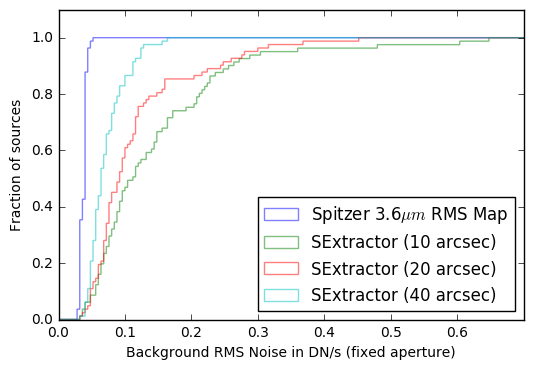

In [9]:
#make histogram showing cutoutsize comparison (with comparison with rms map)
#make histogram showing backgroundmeshsize comparison (with biggest cutouts available)
phot0=[]
phot1=[]
phot2=[]
phot3=[]
for i in range(big_table.size):
    if big_table.field('Spitzer_ch1_Flag')[i]==1:
        phot0.append(phot[0][i])
        phot1.append(phot[1][i])
        phot2.append(phot[2][i])
        phot3.append(phot[3][i])
f = plt.figure()
ax = f.add_subplot(111)
ax = plt.hist(phot0, 200, range=(0,0.8), normed=True, cumulative=True, alpha=0.5, histtype='step', label='Spitzer 3.6$\mu m$ RMS Map')
ax = plt.hist(phot1, 200, range=(0,0.8), normed=True, cumulative=True, alpha=0.5, histtype='step',label='SExtractor (10 arcsec)')
ax = plt.hist(phot2, 200, range=(0,0.8), normed=True, cumulative=True, alpha=0.5, histtype='step',label='SExtractor (20 arcsec)')
ax = plt.hist(phot3, 200, range=(0,0.8), normed=True, cumulative=True, alpha=0.5, histtype='step',label='SExtractor (40 arcsec)')
plt.axis([0,0.7,0,1.1])
plt.xlabel('Background RMS Noise in DN/s (fixed aperture)')
plt.ylabel('Fraction of sources')
plt.legend(loc='lower right')
path = '/Users/justin/Documents/Master_Thesis/presentation/plots/spitzer_bkgrms_histo.pdf'
plt.savefig(path, format='pdf', dpi=1000,bbox_inches='tight')